In [14]:
required_files = [
    os.path.join(FIG_DIR, "rating_hist.png"),
    os.path.join(FIG_DIR, "ratings_per_user.png"),
    os.path.join(FIG_DIR, "ratings_per_movie.png"),
    os.path.join(FIG_DIR, "sparsity_heatmap_sample.png"),
]
missing = [p for p in required_files if not os.path.exists(p)]
if missing:
    print("Missing figures:")
    for m in missing:
        print(" -", m)
else:
    print("All required figures are saved in:", FIG_DIR)


All required figures are saved in: ..\reports\figures


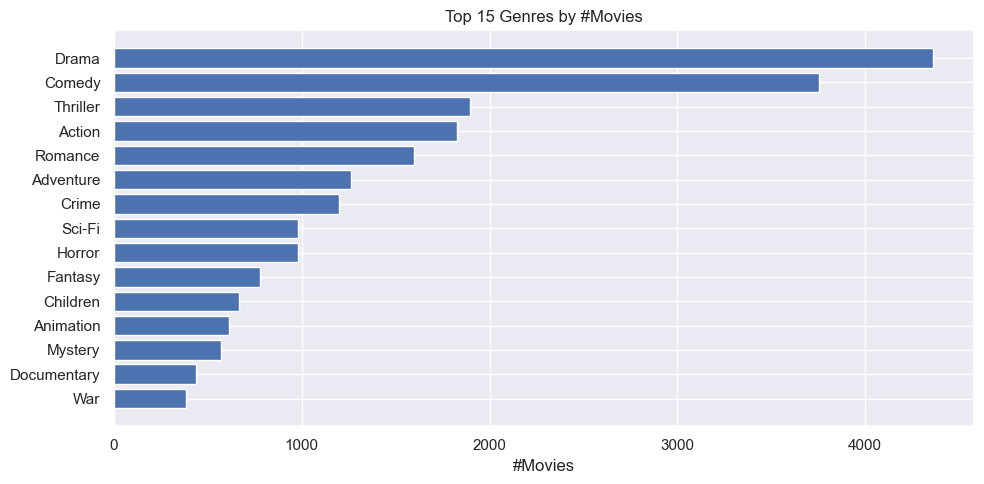

In [13]:
# Expand genres (pipe-separated) into rows
movies_genres = movies.copy()
movies_genres["genres"] = movies_genres["genres"].fillna("(no genres listed)")

genre_counts = (
    movies_genres["genres"]
    .str.split("|")
    .explode()
    .value_counts()
    .head(15)
)

plt.figure(figsize=(10, 5))
plt.barh(genre_counts.index[::-1], genre_counts.values[::-1])
plt.title("Top 15 Genres by #Movies")
plt.xlabel("#Movies")
plt.tight_layout()
plt.show()


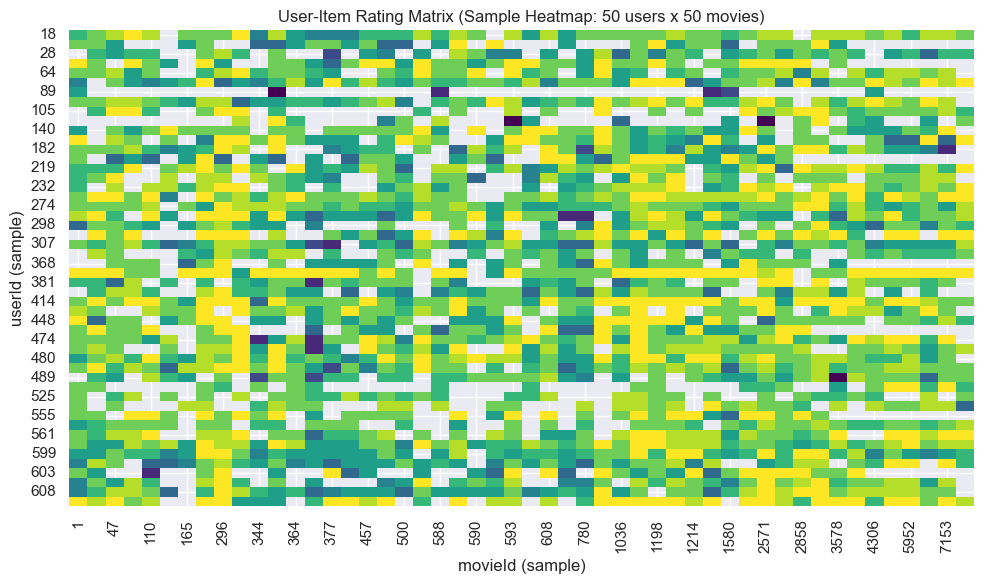

Saved: ..\reports\figures\sparsity_heatmap_sample.png


In [12]:
# Pick a stable sample (top active users + top popular movies) to visualize density
top_users = ratings_per_user.sort_values(ascending=False).head(50).index
top_movies = ratings_per_movie.sort_values(ascending=False).head(50).index

sample = ratings[
    ratings["userId"].isin(top_users) & ratings["movieId"].isin(top_movies)
].copy()

pivot_sample = sample.pivot_table(index="userId", columns="movieId", values="rating", aggfunc="mean")

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_sample, cmap="viridis", cbar=False)
plt.title("User-Item Rating Matrix (Sample Heatmap: 50 users x 50 movies)")
plt.xlabel("movieId (sample)")
plt.ylabel("userId (sample)")
plt.tight_layout()

out_path = os.path.join(FIG_DIR, "sparsity_heatmap_sample.png")
plt.savefig(out_path, dpi=200)
plt.show()

print("Saved:", out_path)


In [11]:
total_cells = n_users * n_movies
sparsity = 1 - (n_ratings / total_cells)

print(f"User-item matrix size = {n_users} x {n_movies} = {total_cells:,}")
print(f"Observed ratings = {n_ratings:,}")
print(f"Sparsity = {sparsity:.6f}  (~ {sparsity*100:.2f}%)")


User-item matrix size = 610 x 9724 = 5,931,640
Observed ratings = 100,836
Sparsity = 0.983000  (~ 98.30%)


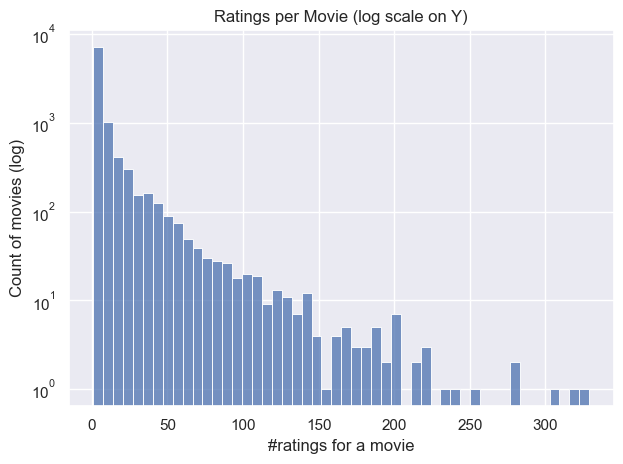

In [10]:
plt.figure()
sns.histplot(ratings_per_movie, bins=50)
plt.yscale("log")
plt.title("Ratings per Movie (log scale on Y)")
plt.xlabel("#ratings for a movie")
plt.ylabel("Count of movies (log)")
plt.tight_layout()
plt.show()


Ratings per movie - describe:


count    9724.000000
mean       10.369807
std        22.401005
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       329.000000
dtype: float64

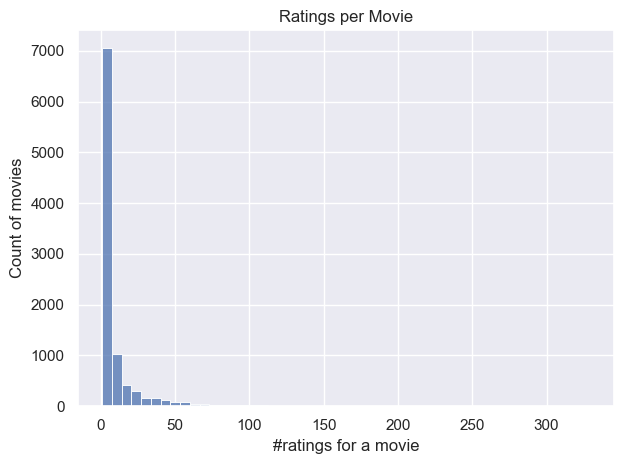

Saved: ..\reports\figures\ratings_per_movie.png


In [9]:
ratings_per_movie = ratings.groupby("movieId").size()

print("Ratings per movie - describe:")
display(ratings_per_movie.describe())

plt.figure()
sns.histplot(ratings_per_movie, bins=50)
plt.title("Ratings per Movie")
plt.xlabel("#ratings for a movie")
plt.ylabel("Count of movies")
plt.tight_layout()

out_path = os.path.join(FIG_DIR, "ratings_per_movie.png")
plt.savefig(out_path, dpi=200)
plt.show()

print("Saved:", out_path)


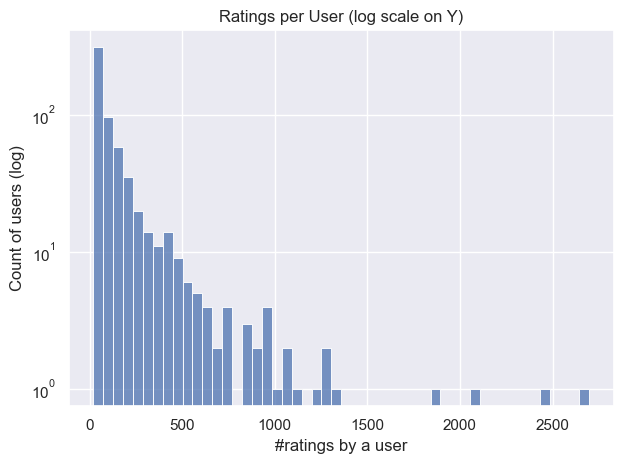

In [8]:
plt.figure()
sns.histplot(ratings_per_user, bins=50)
plt.yscale("log")
plt.title("Ratings per User (log scale on Y)")
plt.xlabel("#ratings by a user")
plt.ylabel("Count of users (log)")
plt.tight_layout()
plt.show()


Ratings per user - describe:


count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
dtype: float64

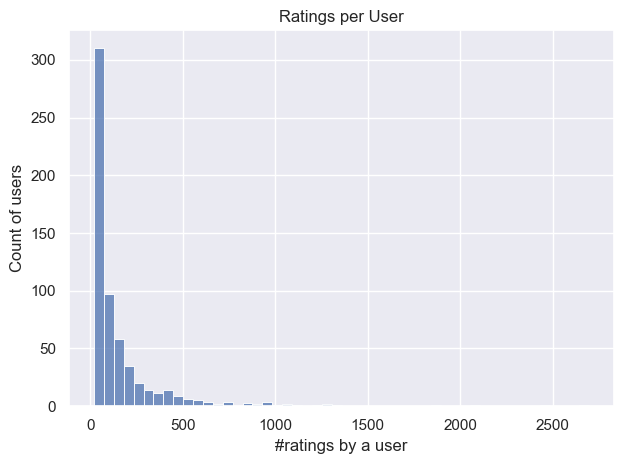

Saved: ..\reports\figures\ratings_per_user.png


In [7]:
ratings_per_user = ratings.groupby("userId").size()

print("Ratings per user - describe:")
display(ratings_per_user.describe())

plt.figure()
sns.histplot(ratings_per_user, bins=50)
plt.title("Ratings per User")
plt.xlabel("#ratings by a user")
plt.ylabel("Count of users")
plt.tight_layout()

out_path = os.path.join(FIG_DIR, "ratings_per_user.png")
plt.savefig(out_path, dpi=200)
plt.show()

print("Saved:", out_path)


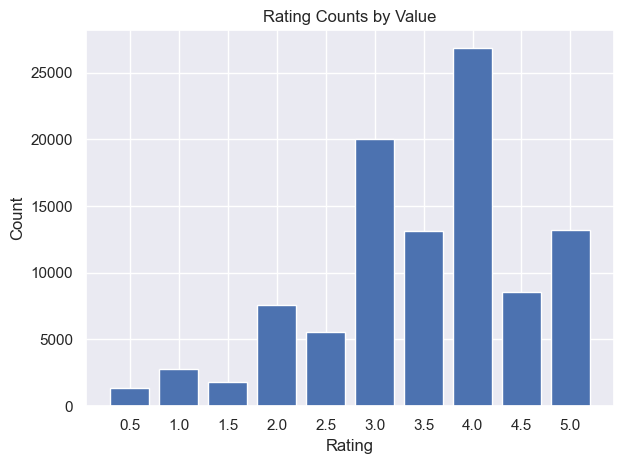

In [6]:
plt.figure()
rating_counts = ratings["rating"].value_counts().sort_index()
plt.bar(rating_counts.index.astype(str), rating_counts.values)
plt.title("Rating Counts by Value")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


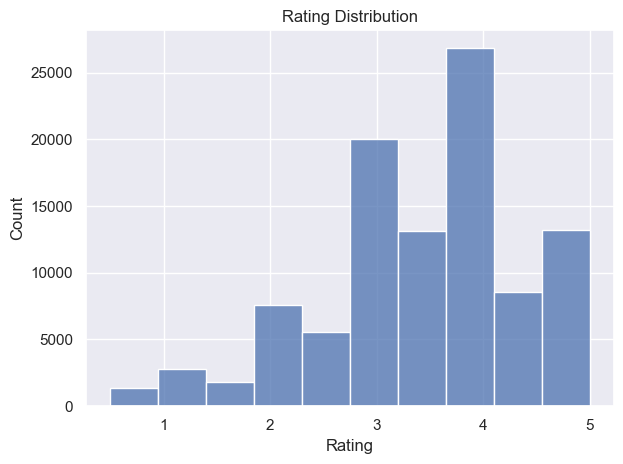

Saved: ..\reports\figures\rating_hist.png


In [5]:
plt.figure()
sns.histplot(ratings["rating"], bins=10, kde=False)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()

out_path = os.path.join(FIG_DIR, "rating_hist.png")
plt.savefig(out_path, dpi=200)
plt.show()

print("Saved:", out_path)


In [4]:
n_users   = ratings["userId"].nunique()
n_movies  = ratings["movieId"].nunique()
n_ratings = len(ratings)

rating_min  = ratings["rating"].min()
rating_max  = ratings["rating"].max()
rating_mean = ratings["rating"].mean()

summary = pd.DataFrame({
    "metric": ["#users", "#movies", "#ratings", "rating_min", "rating_max", "rating_mean"],
    "value":  [n_users, n_movies, n_ratings, rating_min, rating_max, rating_mean]
})

display(summary)

print(f"Users: {n_users}, Movies: {n_movies}, Ratings: {n_ratings}")
print(f"Rating scale: min={rating_min}, max={rating_max}, mean={rating_mean:.3f}")


,metric,value
0,#users,610.000000
1,#movies,9724.000000
2,#ratings,100836.000000
3,rating_min,0.500000
4,rating_max,5.000000
5,rating_mean,3.501557


Users: 610, Movies: 9724, Ratings: 100836
Rating scale: min=0.5, max=5.0, mean=3.502


In [3]:
print("Missing values in ratings:")
display(ratings.isna().sum())

print("\nMissing values in movies:")
display(movies.isna().sum())


Missing values in ratings:


userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


Missing values in movies:


movieId    0
title      0
genres     0
dtype: int64

In [2]:
ratings = pd.read_csv(RATINGS_PATH)
movies  = pd.read_csv(MOVIES_PATH)

print("ratings shape:", ratings.shape)
print("movies shape :", movies.shape)

display(ratings.head())
display(movies.head())

ratings.info()


ratings shape: (100836, 4)
movies shape : (9742, 3)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()  # default seaborn style (ok for EDA)

# Paths
DATA_DIR = os.path.join("..", "data")            # notebooks/ -> ../data
REPORT_DIR = os.path.join("..", "reports")
FIG_DIR = os.path.join(REPORT_DIR, "figures")

os.makedirs(FIG_DIR, exist_ok=True)

RATINGS_PATH = os.path.join(DATA_DIR, "ratings.csv")
MOVIES_PATH  = os.path.join(DATA_DIR, "movies.csv")

print("RATINGS_PATH:", RATINGS_PATH)
print("MOVIES_PATH :", MOVIES_PATH)


RATINGS_PATH: ..\data\ratings.csv
MOVIES_PATH : ..\data\movies.csv


# MovieLens Small - Exploratory Data Analysis (SV2)

**Goal (SV2):**
- Dataset overview (users/movies/ratings, rating stats)
- Rating distribution
- Ratings per user
- Ratings per movie
- Sparsity of user–item matrix + heatmap sample

**Outputs:**
- reports/figures/rating_hist.png
- reports/figures/ratings_per_user.png
- reports/figures/ratings_per_movie.png
- reports/figures/sparsity_heatmap_sample.png
- reports/eda_summary.md (written manually at the end)
